In [1]:
#https://github.com/datablogger-ml/Time-Series-Forecasting/blob/master/Time%20Series%20Forecasting.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab 
from pylab import *
pylab.rcParams['figure.figsize'] = (16, 6) # size for all figures
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.head()

#y = pd.Series(data=df['PM2.5'].values, index=df['Date'])
#y.head()

,Date,PM2.5
0,2021-01-01,228.53
1,2021-02-01,222.37
2,2021-03-01,128.14
3,2021-04-01,68.44
4,2021-05-01,62.51


In [3]:
df = df.set_index('Date').asfreq('D')

In [4]:
df.columns = ['PM2.5']

In [5]:
print(f'The Daily data consists of values from {df.index.min()} to {df.index.max()}')

The Daily data consists of values from 2021-01-01 00:00:00 to 2021-12-31 00:00:00


In [6]:
#from pmdarima import auto_arima
filterwarnings('ignore')

In [7]:
# Finding the split point index to keep 1 month (30 days) data as test set
n_test = 61
train_data = df.iloc[:len(df) - n_test]
test_data = df.iloc[len(df) - n_test:]

In [8]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [9]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
model = ARIMA(train_data['PM2.5'],order=(1,2,3))
results = model.fit()
results.summary()

C:\Users\91783\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                  304
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1590.503
Date:                Thu, 13 Oct 2022   AIC                           3191.006
Time:                        14:08:09   BIC                           3209.559
Sample:                    01-01-2021   HQIC                          3198.429
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2789      0.150      1.861      0.063      -0.015       0.573
ma.L1         -1.8033      0.195     -9.266      0.000      -2.185      -1.422
ma.L2          0.6139      0.324      1.893      0.058      -0.022       1.249
ma.L3          0.1917      0.151      1.266      0.205      -0.105       0.488
sigma2      2094.5673    256.470      8.167      0.000    1591.896    2597.238
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               113.65
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.04
Prob(H) (two-sided):                  0.89   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# Obtain predicted values on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start,end=end,dynamic=True,typ='levels').rename('ARIMA Predictions')

In [11]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted = {predictions[i]}, expected = {test_data['PM2.5'][i]}")

predicted = 108.30157833114541, expected = 90.12
predicted = 105.32700425415456, expected = 170.65
predicted = 105.77469838121428, expected = 157.98
predicted = 107.17683465829616, expected = 144.02
predicted = 108.84515691596854, expected = 61.85
predicted = 110.58771623060798, expected = 153.96
predicted = 112.35097964324272, expected = 55.08
predicted = 114.12001725667842, expected = 36.68
predicted = 115.89066524671192, expected = 47.06
predicted = 117.66176235739016, expected = 79.04
predicted = 119.43298472408232, expected = 240.02
predicted = 121.2042420236354, expected = 89.37
predicted = 122.97550906567298, expected = 243.41
predicted = 124.74677882480849, expected = 146.21
predicted = 126.51804934172002, expected = 190.12
predicted = 128.28932006996897, expected = 203.1
predicted = 130.0605908571582, expected = 240.0
predicted = 131.83186166078534, expected = 201.74
predicted = 133.60313246899688, expected = 173.63
predicted = 135.374403278487, expected = 195.11
predicted = 1

In [12]:
compare = pd.DataFrame(columns=['Actual','Predicted'])
compare['Actual'] = test_data['PM2.5']
compare['Predicted'] = predictions
compare.head()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,Actual,Predicted
Date,,
2021-11-01,90.12,108.301578
2021-11-02,170.65,105.327004
2021-11-03,157.98,105.774698
2021-11-04,144.02,107.176835
2021-11-05,61.85,108.845157


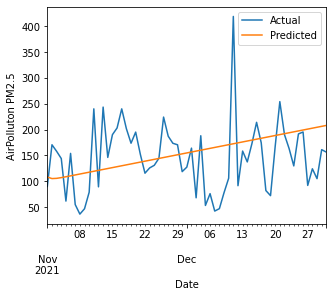

In [13]:
compare.plot(legend=True,figsize=(5, 4))
plt.ylabel('AirPolluton PM2.5')
plt.show()

In [14]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"ARIMA MAE : {mean_absolute_error(compare['Actual'],compare['Predicted'])}")
print(f"ARIMA MSE : {mean_squared_error(compare['Actual'],compare['Predicted'])}")

ARIMA MAE : 56.60815607946653
ARIMA MSE : 5067.1068238496555


In [15]:
rmse = np.mean((compare['Predicted']- compare['Actual'])**2)**.5  # RMSE
print('RMSE')
print(rmse)

RMSE
71.18361345035567


In [16]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [17]:
scaled_dataset[:2,:]

array([[0.52260448],
       [0.37205036]])

In [18]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

In [19]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (361, 1)
X (361, 4, 1)


In [20]:
#Splitting the dataset
n_train = 61
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (300, 4, 1)
X_test (61, 4, 1)
Y_train (300, 1)
Y_test (61, 1)


In [21]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')   

In [22]:
history = model.fit(X_train, Y_train, epochs=50,
                    batch_size=8, validation_data=(X_test, Y_test),
                    verbose=2, shuffle=False)

Epoch 1/50
38/38 - 11s - loss: 0.0353 - val_loss: 0.0171 - 11s/epoch - 300ms/step
Epoch 2/50
38/38 - 0s - loss: 0.0268 - val_loss: 0.0218 - 232ms/epoch - 6ms/step
Epoch 3/50
38/38 - 0s - loss: 0.0264 - val_loss: 0.0213 - 250ms/epoch - 7ms/step
Epoch 4/50
38/38 - 0s - loss: 0.0255 - val_loss: 0.0205 - 235ms/epoch - 6ms/step
Epoch 5/50
38/38 - 0s - loss: 0.0258 - val_loss: 0.0205 - 227ms/epoch - 6ms/step
Epoch 6/50
38/38 - 0s - loss: 0.0251 - val_loss: 0.0195 - 226ms/epoch - 6ms/step
Epoch 7/50
38/38 - 0s - loss: 0.0241 - val_loss: 0.0185 - 214ms/epoch - 6ms/step
Epoch 8/50
38/38 - 0s - loss: 0.0236 - val_loss: 0.0180 - 232ms/epoch - 6ms/step
Epoch 9/50
38/38 - 0s - loss: 0.0228 - val_loss: 0.0172 - 219ms/epoch - 6ms/step
Epoch 10/50
38/38 - 0s - loss: 0.0235 - val_loss: 0.0177 - 224ms/epoch - 6ms/step
Epoch 11/50
38/38 - 0s - loss: 0.0236 - val_loss: 0.0169 - 232ms/epoch - 6ms/step
Epoch 12/50
38/38 - 0s - loss: 0.0228 - val_loss: 0.0166 - 207ms/epoch - 5ms/step
Epoch 13/50
38/38 - 0s -

In [23]:
#Taking predictions
Y_pred_3 = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred_3)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

2/2 [==============================] - 2s 0s/step
0.010048724035457625
0.10024332414409264


In [24]:
d=pd.DataFrame(predictions)

In [25]:
d1=pd.DataFrame(Y_pred_3)

In [26]:
d['LSTM_Y_pred_3'] = d1.values

In [27]:
d

,ARIMA Predictions,LSTM_Y_pred_3
2021-11-01,108.301578,0.271582
2021-11-02,105.327004,0.231216
2021-11-03,105.774698,0.168543
2021-11-04,107.176835,0.184887
2021-11-05,108.845157,0.107880
...,...,...
2021-12-27,200.911423,0.238209
2021-12-28,202.682694,0.218814
2021-12-29,204.453965,0.211923
2021-12-30,206.225236,0.293072


In [28]:
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2021-11-01 to 2021-12-31
Freq: D
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ARIMA Predictions  61 non-null     float64
 1   LSTM_Y_pred_3      61 non-null     float32
dtypes: float32(1), float64(1)
memory usage: 1.2 KB


In [29]:
a=add(d,d1)

In [30]:
a

,ARIMA Predictions,LSTM_Y_pred_3
2021-11-01,108.573160,0.543164
2021-11-02,105.558221,0.462433
2021-11-03,105.943241,0.337086
2021-11-04,107.361722,0.369774
2021-11-05,108.953037,0.215761
...,...,...
2021-12-27,201.149632,0.476417
2021-12-28,202.901508,0.437628
2021-12-29,204.665888,0.423846
2021-12-30,206.518308,0.586145


In [31]:
total = a['ARIMA Predictions'] + a['LSTM_Y_pred_3']

In [32]:
total=total/2

In [33]:
total

2021-11-01     54.558162
2021-11-02     53.010327
2021-11-03     53.140164
2021-11-04     53.865748
2021-11-05     54.584399
                 ...    
2021-12-27    100.813025
2021-12-28    101.669568
2021-12-29    102.544867
2021-12-30    103.552227
2021-12-31    104.474577
Freq: D, Length: 61, dtype: float64

In [34]:
compare['Predicted'] = total

In [35]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"ARIMA MAE : {mean_absolute_error(compare['Actual'],compare['Predicted'])}")
print(f"ARIMA MSE : {mean_squared_error(compare['Actual'],compare['Predicted'])}")

ARIMA MAE : 74.12457944692869
ARIMA MSE : 8968.205251269743


In [36]:
compare['Actual']

Date
2021-11-01     90.12
2021-11-02    170.65
2021-11-03    157.98
2021-11-04    144.02
2021-11-05     61.85
               ...  
2021-12-27     92.11
2021-12-28    124.25
2021-12-29    105.15
2021-12-30    161.22
2021-12-31    156.41
Freq: D, Name: Actual, Length: 61, dtype: float64

In [37]:
rmse = np.mean((compare['Predicted']- compare['Actual'])**2)**.5  # RMSE
print('RMSE')
print(rmse)

RMSE
94.70060850527702
